### Taller Unidad 11 Aprendizaje Automático

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install sodapy
from sodapy import Socrata
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.27.1, but you have requests 2.31.0 which is incompatible.


### Primer punto 

Usando Socrata, Cargue un dataset que se encuentre en el portal de datos públicos de Colombia

TARIFAS PARA SERVICIO DE GAS

In [4]:
client = Socrata('www.datos.gov.co',None)
results = client.get('ekup-y869') 

data = pd.DataFrame.from_records(results)
data.head()

,sector,estrato,cargo_fijo,cargo_por_consumo_menor,cargo_por_consumo_mayor,year,mes
0,Residencial,1,0.00,964.42,2105.60,2020,Mayo
1,Residencial,2,0.00,1201.40,2105.60,2020,Mayo
2,Residencial,3,3179.89,2105.60,2105.60,2020,Mayo
3,Residencial,4,3179.89,2105.60,2105.60,2020,Mayo
4,Residencial,5,3815.87,2526.72,2526.72,2020,Mayo


### Tareas de limpieza necesarias

In [5]:
#Renombrar Columnas

data = data.drop("estrato", axis=1)

data.columns=["sector","cargo_fijo","cargo_consumo_menor","cargo_consumo_mayor","año","mes"]

# Verificar tipos de datos
data.dtypes

# Manejar valores faltantes
data.dropna(inplace=True)  # Eliminar filas con valores faltantes

# Eliminar duplicados
data.drop_duplicates(inplace=True)

# Eliminar NA

data.dropna()


# Mapear las categorías del campo "sector" a valores numéricos
sector_mapping = {
    'Residencial': 1,
    'No Residencial': 2,
    'Comercial': 3,
    'Industrial': 4,
    'Oficial y Exenta': 5
}

data['sector'] = data['sector'].replace(sector_mapping)

# Mapear las categorías de la columna "mes" a valores numéricos
mes_mapping = {
    'Mayo': 5, 'Junio': 6, 'Julio': 7, 'julio': 7, 'Agosto': 8, 'Septiembre': 9, 'Octubre': 10,
    'Noviembre': 11,'Diciembre': 12, 'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4
}

data['mes'] = data['mes'].replace(mes_mapping)

data.head(5)

,sector,cargo_fijo,cargo_consumo_menor,cargo_consumo_mayor,año,mes
0,1,0.00,964.42,2105.60,2020,5
1,1,0.00,1201.40,2105.60,2020,5
2,1,3179.89,2105.60,2105.60,2020,5
4,1,3815.87,2526.72,2526.72,2020,5
6,2,3179.89,1845.69,1845.69,2020,5


### Dividir el conjunto entre datos de entrenamiento y datos de prueba, los datos de prueba serán el 15% del dataset

In [6]:
# Dividir el conjunto de datos en datos de entrenamiento y datos de prueba
train_data, test_data = train_test_split(data, test_size=0.15, random_state=42)

# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento:", train_data.shape)
print("Tamaño del conjunto de prueba:", test_data.shape)


Tamaño del conjunto de entrenamiento: (385, 6)
Tamaño del conjunto de prueba: (69, 6)


### Aplicar el algoritmo de clasificación de los K vecinos más cercanos

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Dividir el conjunto de datos en características (X) y etiquetas (y)
X_train = train_data.drop("cargo_fijo", axis=1)
y_train = train_data["cargo_consumo_mayor"]
X_test = test_data.drop("cargo_fijo", axis=1)
y_test = test_data["cargo_consumo_mayor"]

# Crear el clasificador KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Especifica el número de vecinos a considerar (en este caso, 5)

# Entrenar el clasificador KNN
knn.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo KNN:", accuracy)


Precisión del modelo KNN: 0.17391304347826086


### Calcular los puntajes de la clasificación

In [8]:
# Calcular los puntajes de la clasificación
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

# Imprimir los puntajes
print("Puntaje de clasificación en el conjunto de entrenamiento:", train_score)
print("Puntaje de clasificación en el conjunto de prueba:", test_score)


Puntaje de clasificación en el conjunto de entrenamiento: 0.37662337662337664
Puntaje de clasificación en el conjunto de prueba: 0.17391304347826086


### Concluir si la clasificación fue buena o no

Los puntajes de clasificación obtenidos revelan un bajo desempeño del modelo KNN en ambos conjuntos de datos. El puntaje de clasificación en el conjunto de entrenamiento es aproximadamente del 37.7%, lo cual indica dificultades para capturar los patrones en los datos de entrenamiento de manera precisa.

Adicionalmente, el puntaje de clasificación en el conjunto de prueba es de aproximadamente 17.4%, lo cual sugiere una falta de capacidad para generalizar correctamente y un bajo rendimiento en datos no vistos anteriormente.

Estos resultados indican que el modelo KNN no es efectivo para realizar una clasificación precisa y eficiente en este caso en particular. Sería recomendable explorar otras técnicas de clasificación o ajustar los parámetros del modelo con el objetivo de mejorar su rendimiento. También es importante evaluar si los datos de entrada y las características utilizadas son apropiados para el problema de clasificación en cuestión.

### Segundo Punto
 Usando Socrata, Cargue un dataset que se encuentre en el portal de datos públicos de Colombia

 
TARIFAS PARA SERVICIO DE GAS

In [9]:
client = Socrata('www.datos.gov.co',None)
results = client.get('3dma-ihgq') 

data = pd.DataFrame.from_records(results)
data.head()

,tipo_de_usuario,estrato_de_la_vivienda,consumo_julio_2020,consumo_agosto_2020,consumo_septiembre_2020,consumo_octubre_2020,consumo_noviem_2020,consumo_diciembre_2020,promedio
0,RESIDENCIAL,ESTRATO 1,30,1,1,3,3,23,10.16666667
1,RESIDENCIAL,ESTRATO 2,0,0,1,0,2,0,0.5
2,RESIDENCIAL,ESTRATO 2,31,10,8,19,8,46,20.33333333
3,RESIDENCIAL,ESTRATO 2,14,9,8,26,5,19,13.5
4,RESIDENCIAL,ESTRATO 2,39,22,0,0,0,6,11.16666667


### Tareas de limpieza necesarias

In [10]:
data.dropna()


data = data.drop("tipo_de_usuario", axis=1)


# Verificar tipos de datos
data.dtypes

# Manejar valores faltantes
data.dropna(inplace=True)  # Eliminar filas con valores faltantes

# Eliminar duplicados
data.drop_duplicates(inplace=True)

# Eliminar NA

data.dropna()

,estrato_de_la_vivienda,consumo_julio_2020,consumo_agosto_2020,consumo_septiembre_2020,consumo_octubre_2020,consumo_noviem_2020,consumo_diciembre_2020,promedio
0,ESTRATO 1,30,1,1,3,3,23,10.16666667
1,ESTRATO 2,0,0,1,0,2,0,0.5
2,ESTRATO 2,31,10,8,19,8,46,20.33333333
3,ESTRATO 2,14,9,8,26,5,19,13.5
4,ESTRATO 2,39,22,0,0,0,6,11.16666667
...,...,...,...,...,...,...,...,...
995,ESTRATO 2,11,11,10,12,9,12,10.83333333
996,ESTRATO 2,35,24,41,41,39,24,34
997,ESTRATO 2,19,17,15,17,13,15,16
998,ESTRATO 2,12,13,15,9,6,11,11


In [11]:
data.estrato_de_la_vivienda.unique()

array(['ESTRATO 1', 'ESTRATO 2', 'ESTRATO 3', 'ESTRATO 4', 'ESTRATO 1.0'],
      dtype=object)

In [12]:
# Mapear las categorías del campo "estrato_de_la_vivienda" a valores numéricos
sector_mapping = {
    'ESTRATO 1': 1,
    'ESTRATO 2': 2,
    'ESTRATO 3': 3,
    'ESTRATO 4': 4,
    'ESTRATO 5': 5,
    'ESTRATO 1.0':1
}

data['estrato_de_la_vivienda'] = data['estrato_de_la_vivienda'].replace(sector_mapping)

data.head()


,estrato_de_la_vivienda,consumo_julio_2020,consumo_agosto_2020,consumo_septiembre_2020,consumo_octubre_2020,consumo_noviem_2020,consumo_diciembre_2020,promedio
0,1,30,1,1,3,3,23,10.16666667
1,2,0,0,1,0,2,0,0.5
2,2,31,10,8,19,8,46,20.33333333
3,2,14,9,8,26,5,19,13.5
4,2,39,22,0,0,0,6,11.16666667


### Aplicación el algoritmo de agrupamiento de las K medias

In [13]:
# Crear una instancia del clasificador K-means
kmeans = KMeans(n_clusters=3)  # Especifica el número de grupos (en este caso, 3)

# Seleccionar las características para el agrupamiento
features = ['consumo_julio_2020', 'consumo_agosto_2020', 'consumo_septiembre_2020', 'consumo_octubre_2020',
            'consumo_noviem_2020', 'consumo_diciembre_2020']

# Entrenar el modelo de K-means
kmeans.fit(data[features])

# Obtener las etiquetas de los grupos asignados a cada muestra
labels = kmeans.labels_

# Añadir las etiquetas al DataFrame original
data['grupo'] = labels

# Imprimir el DataFrame con las etiquetas de los grupos
data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,estrato_de_la_vivienda,consumo_julio_2020,consumo_agosto_2020,consumo_septiembre_2020,consumo_octubre_2020,consumo_noviem_2020,consumo_diciembre_2020,promedio,grupo
0,1,30,1,1,3,3,23,10.16666667,0
1,2,0,0,1,0,2,0,0.5,0
2,2,31,10,8,19,8,46,20.33333333,0
3,2,14,9,8,26,5,19,13.5,0
4,2,39,22,0,0,0,6,11.16666667,0


In [14]:
# Calcular la inercia del modelo K-means
inertia = kmeans.inertia_

# Imprimir la inercia
print("Inercia del modelo K-means:", inertia)


Inercia del modelo K-means: 3298960.8176082005


In [15]:
data.estrato_de_la_vivienda.unique()

array([1, 2, 3, 4])

### Representar gráficamente los grupos

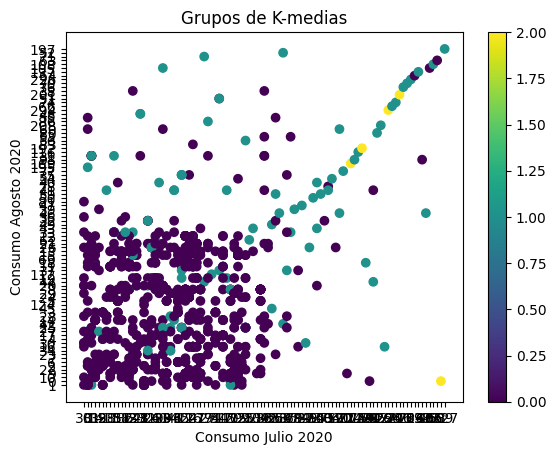

In [16]:
# Obtener las coordenadas de las características para el diagrama de dispersión
x = data['consumo_julio_2020']
y = data['consumo_agosto_2020']

# Obtener las etiquetas de los grupos
labels = data['grupo']

# Colormap para asignar colores a los grupos
cmap = 'viridis'

# Crear el diagrama de dispersión
plt.scatter(x, y, c=labels, cmap=cmap)

# Agregar leyenda
plt.colorbar()

# Etiquetas de los ejes
plt.xlabel('Consumo Julio 2020')
plt.ylabel('Consumo Agosto 2020')

# Título del gráfico
plt.title('Grupos de K-medias')

# Mostrar el gráfico
plt.show()


In [17]:
from sklearn.metrics import silhouette_score, pairwise_distances
import numpy as np

# Calcular el índice de silueta
silhouette_avg = silhouette_score(data, labels)
print("Índice de silueta:", silhouette_avg)



Índice de silueta: 0.6311808015057138


### Concluir si la agrupación fue buena o no

Se ha calculado un índice de silueta de 0.6311808015057138, el cual se acerca a 1. Este valor sugiere que la agrupación exhibe una destacada separación entre los grupos y una coherencia interna aceptable dentro de cada uno. En consecuencia, podemos concluir que la agrupación demuestra ser relativamente sólida en su estructura